1. Librerias

In [3]:
# ------------------------ Visualización ------------------------
import matplotlib.pyplot as plt                          # trazado básico con Matplotlib
import matplotlib.dates as mdates                        # formateo de fechas en ejes
from matplotlib.dates import DateFormatter               # formatos personalizados de fecha
import matplotlib.patches as mpatches                    # creación de parches / leyendas
from matplotlib.patches import Ellipse                   #create and draw elliptical shapes within a Matplotlib plot.
%matplotlib inline
import seaborn as sns                                    # visualizaciones estadísticas construidas sobre Matplotlib


# ------------------------ Manipulación de datos ------------------------
import pandas as pd                                      # estructuras tipo DataFrame
import numpy as np
from sklearn.preprocessing import StandardScaler         #Z-score normalization.
from sklearn.decomposition import PCA
#from ydata_profiling import ProfileReport                #analisis exploratorio
from scipy import stats
from scipy.cluster.hierarchy import linkage, dendrogram, set_link_color_palette

from scipy.cluster.hierarchy import dendrogram           #function is used to visualize the results of hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import PolynomialFeatures   #transformación datos X al cuadrado

#----------------------- Factor Analyzer -------------------------------

'''
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer
import networkx as nx
'''

#---------------------- linear regression (OLS), generalized linear models (GLM), and various statistical tests.
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
from statsmodels.stats.diagnostic import het_white
from statsmodels.sandbox.stats.runs import runstest_1samp
from scipy.stats import kstest
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.stats.stattools import durbin_watson
#Cargar las librerías


from collections import Counter
import math


#----------------------- UC Irvine Machine Learning Repository ---------------------------------------------
from ucimlrepo import fetch_ucirepo


2. Cargar el conjunto de datos

In [4]:
#codigo de https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified
idcode=555


try:
    from ucimlrepo import fetch_ucirepo
    # fetch dataset
    apartment_for_rent_classified = fetch_ucirepo(id=idcode)

    # data (as pandas dataframes)
    datos = apartment_for_rent_classified.data.features


    print(apartment_for_rent_classified.variables)


except ModuleNotFoundError:
    print("La librería 'ucimlrepo' no está instalada.")
    # Puedes añadir aquí un comando para instalarla, por ejemplo:
    import subprocess
    subprocess.check_call(["pip", "install", "ucimlrepo"])

except Exception as e:  # Catching other types of exceptions
    print(f"Error inesperado: {e}")


             name     role         type demographic description units  \
0              id       ID      Integer        None        None  None   
1        category  Feature  Categorical        None        None  None   
2           title  Feature  Categorical        None        None  None   
3            body  Feature  Categorical        None        None  None   
4       amenities  Feature  Categorical        None        None  None   
5       bathrooms  Feature      Integer        None        None  None   
6        bedrooms  Feature  Categorical        None        None  None   
7        currency  Feature  Categorical        None        None  None   
8             fee  Feature  Categorical        None        None  None   
9       has_photo  Feature  Categorical        None        None  None   
10   pets_allowed  Feature  Categorical        None        None  None   
11          price  Feature      Integer        None        None  None   
12  price_display  Feature      Integer        None

/usr/local/lib/python3.12/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (0,5,6,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


EDA

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       99826 non-null  object 
 1   title          99826 non-null  object 
 2   body           99826 non-null  object 
 3   amenities      83749 non-null  object 
 4   bathrooms      99760 non-null  object 
 5   bedrooms       99699 non-null  object 
 6   currency       99822 non-null  object 
 7   fee            99823 non-null  object 
 8   has_photo      99823 non-null  object 
 9   pets_allowed   39192 non-null  object 
 10  price          99821 non-null  float64
 11  price_display  99820 non-null  object 
 12  price_type     99823 non-null  object 
 13  square_feet    99823 non-null  object 
 14  address        7946 non-null   object 
 15  cityname       99521 non-null  object 
 16  state          99521 non-null  object 
 17  latitude       99797 non-null  float64
 18  longit

In [6]:
datos.describe()

,price,latitude,longitude,time
count,99821.000000,9.979700e+04,99795.000000,9.982000e+04
mean,1527.208493,3.147604e+04,-91.562177,1.559690e+09
std,903.635759,7.022820e+06,15.819296,1.104487e+07
min,100.000000,1.957380e+01,-159.369800,1.544174e+09
25%,1014.000000,3.374960e+01,-104.791900,1.550832e+09
50%,1350.000000,3.722970e+01,-84.562300,1.568745e+09
75%,1795.000000,3.995390e+01,-77.585300,1.568767e+09
max,52500.000000,1.568782e+09,-68.778800,1.577391e+09


In [7]:
datos.head()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,Cats,...,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,"Cats,Dogs",...,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,NaN,...,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,"Cats,Dogs",...,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,"Cats,Dogs",...,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09


##Limpieza de datos

In [8]:
#transformar bathroom a integer
#datos['fbathrooms'] = datos['bathrooms'].astype(float)
#datos['fbathrooms'] = pd.to_numeric(datos['bathrooms'], errors='coerce')


#print(f"Tipo inicial: {datos['bathrooms'].dtype}")
#print("Datos iniciales:")
#print(datos['bathrooms'])

datos['bathrooms'] = pd.to_numeric(datos['bathrooms'], errors='coerce')
datos['bedrooms'] = pd.to_numeric(datos['bedrooms'], errors='coerce')
datos['bedrooms'] = pd.to_numeric(datos['bedrooms'], errors='coerce')
datos['square_feet'] = pd.to_numeric(datos['square_feet'], errors='coerce')


datos.info()
#print(f"Tipo inicial: {datos['bathrooms'].dtype}")
#print("Datos iniciales:")
#print(datos['bathrooms'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       99826 non-null  object 
 1   title          99826 non-null  object 
 2   body           99826 non-null  object 
 3   amenities      83749 non-null  object 
 4   bathrooms      99757 non-null  float64
 5   bedrooms       99696 non-null  float64
 6   currency       99822 non-null  object 
 7   fee            99823 non-null  object 
 8   has_photo      99823 non-null  object 
 9   pets_allowed   39192 non-null  object 
 10  price          99821 non-null  float64
 11  price_display  99820 non-null  object 
 12  price_type     99823 non-null  object 
 13  square_feet    99821 non-null  float64
 14  address        7946 non-null   object 
 15  cityname       99521 non-null  object 
 16  state          99521 non-null  object 
 17  latitude       99797 non-null  float64
 18  longit

/tmp/ipython-input-482566658.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['bathrooms'] = pd.to_numeric(datos['bathrooms'], errors='coerce')
/tmp/ipython-input-482566658.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['bedrooms'] = pd.to_numeric(datos['bedrooms'], errors='coerce')
/tmp/ipython-input-482566658.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [9]:
datos.to_csv('dataset.csv',sep=';')

In [10]:
datos.describe()

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,99757.000000,99696.000000,99821.000000,99821.000000,9.979700e+04,99795.000000,9.982000e+04
mean,1.445332,1.727983,1527.208493,956.402487,3.147604e+04,-91.562177,1.559690e+09
std,0.546906,0.748941,903.635759,417.261273,7.022820e+06,15.819296,1.104487e+07
min,1.000000,0.000000,100.000000,37.624900,1.957380e+01,-159.369800,1.544174e+09
25%,1.000000,1.000000,1014.000000,729.000000,3.374960e+01,-104.791900,1.550832e+09
50%,1.000000,2.000000,1350.000000,900.000000,3.722970e+01,-84.562300,1.568745e+09
75%,2.000000,2.000000,1795.000000,1115.000000,3.995390e+01,-77.585300,1.568767e+09
max,9.000000,9.000000,52500.000000,50000.000000,1.568782e+09,-68.778800,1.577391e+09


## Análisis Descriptivo

In [13]:
# Análisis descriptivo de las columnas numéricas
display(datos.describe())

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,99757.000000,99696.000000,99821.000000,99821.000000,9.979700e+04,99795.000000,9.982000e+04
mean,1.445332,1.727983,1527.208493,956.402487,3.147604e+04,-91.562177,1.559690e+09
std,0.546906,0.748941,903.635759,417.261273,7.022820e+06,15.819296,1.104487e+07
min,1.000000,0.000000,100.000000,37.624900,1.957380e+01,-159.369800,1.544174e+09
25%,1.000000,1.000000,1014.000000,729.000000,3.374960e+01,-104.791900,1.550832e+09
50%,1.000000,2.000000,1350.000000,900.000000,3.722970e+01,-84.562300,1.568745e+09
75%,2.000000,2.000000,1795.000000,1115.000000,3.995390e+01,-77.585300,1.568767e+09
max,9.000000,9.000000,52500.000000,50000.000000,1.568782e+09,-68.778800,1.577391e+09


##Visualizaciones

#### Histograma de la columna 'price'

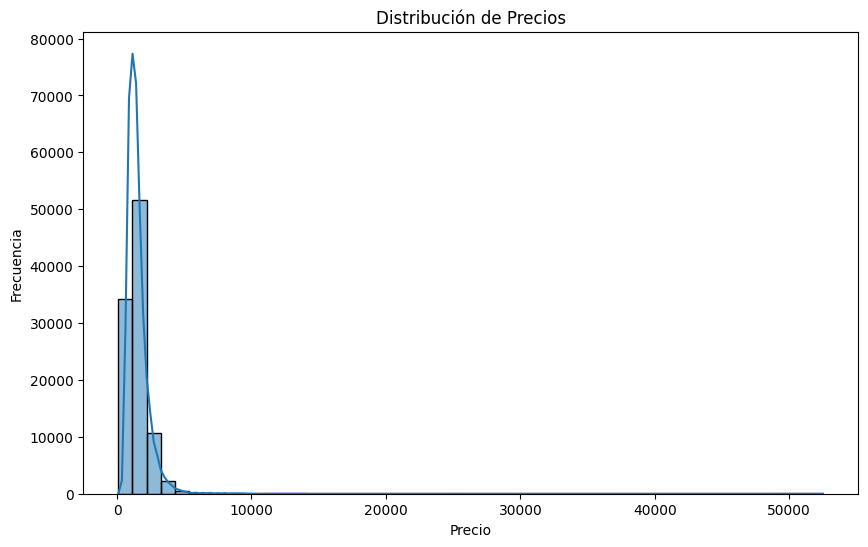

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(datos['price'].dropna(), kde=True, bins=50)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

### Histograma de la columna 'square_feet'

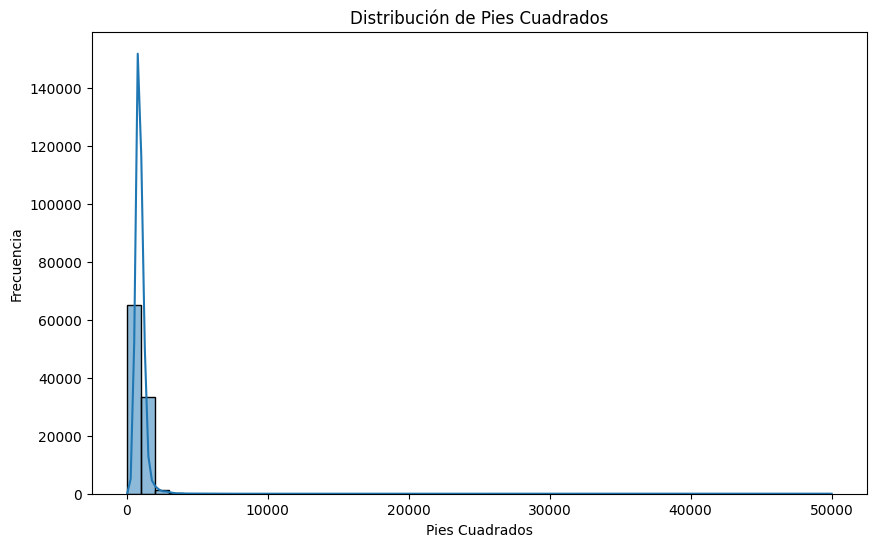

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(datos['square_feet'].dropna(), kde=True, bins=50)
plt.title('Distribución de Pies Cuadrados')
plt.xlabel('Pies Cuadrados')
plt.ylabel('Frecuencia')
plt.show()

### Diagrama de dispersión entre 'price' y 'square_feet'

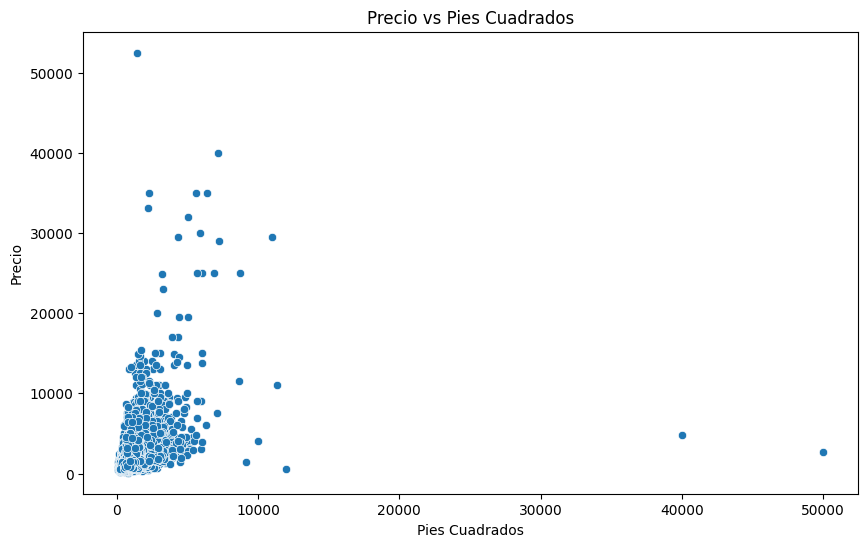

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='square_feet', y='price', data=datos)
plt.title('Precio vs Pies Cuadrados')
plt.xlabel('Pies Cuadrados')
plt.ylabel('Precio')
plt.show()


### Boxplot de 'price' por 'bedrooms' (considerando solo hasta 5 habitaciones para mejor visualización)


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='price', data=datos[datos['bedrooms'] <= 5])
plt.title('Distribución de Precios por Número de Habitaciones')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio')
plt.show()

### Boxplot de 'price' por 'bathrooms' (considerando solo hasta 4 baños para mejor visualización)


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='bathrooms', y='price', data=datos[datos['bathrooms'] <= 4])
plt.title('Distribución de Precios por Número de Baños')
plt.xlabel('Número de Baños')
plt.ylabel('Precio')
plt.show()